#This Python notebook deals with the Tracking of the ball from the frames obtained from the Isolation python notebook and then predicting its trajectory towards the stumps

In [ ]:
import numpy as np
from matplotlib.pyplot import figure
import cv2
import mahotas 
import math

In [ ]:
#finding the centre of mass of the isolated object from the contoured video
centers = []
frame_count =0
cap = cv2.VideoCapture(r"C:\Users\Karthik\Downloads\DIP_DRS\hotspot.mov")
fourcc = cv2.VideoWriter_fourcc(*'BA81')
output = np.zeros((1920, 1080))
print(cap.isOpened()) 
while(cap.isOpened()):
    ret, frame = cap.read()
    frame_count+=1
    if ret == True:
        center = mahotas.center_of_mass(frame) 
        if  not math.isnan(center[0]):
            print(center)
            centers.append(center) 
    if frame_count ==322 :
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

True
[506.52950687  10.81926319   1.        ]
[535.68633008  70.79307936   1.00270235]
[654.49506903 249.99309665   1.        ]
[655. 248.   1.]
[730.43189756 363.94470314   1.        ]
[2.04862745e+01 1.80088235e+03 1.00000000e+00]
[791.43216236 467.36849696   1.        ]
[764.49668903 491.81449833   1.00305964]
[729.77432864 511.0107313    1.00099461]
[705.00800172 535.69367397   1.00148911]
[1.76250e+02 1.41775e+03 1.00000e+00]
[649.00556087 582.50540881   1.00173777]
[626.81323418 606.84759648   0.99942798]
[596.88221462 624.40808038   1.        ]
[577.64699878 653.39865251   1.00020416]
[543.71960298 681.45905707   0.96029777]
[530.79878472 698.94633172   0.998695  ]
[4.74531915e+02 8.50425532e+02 3.19148936e-01]
[487.35242634 744.1669844    0.99722704]
[474.60315671 770.93478449   0.99722487]
[4.74531915e+02 8.50425532e+02 3.19148936e-01]
[438.43517917 817.11524017   0.999407  ]
[4.74531915e+02 8.50425532e+02 3.19148936e-01]
[407.62732304 864.14246501   0.99856005]
[401.95879397 

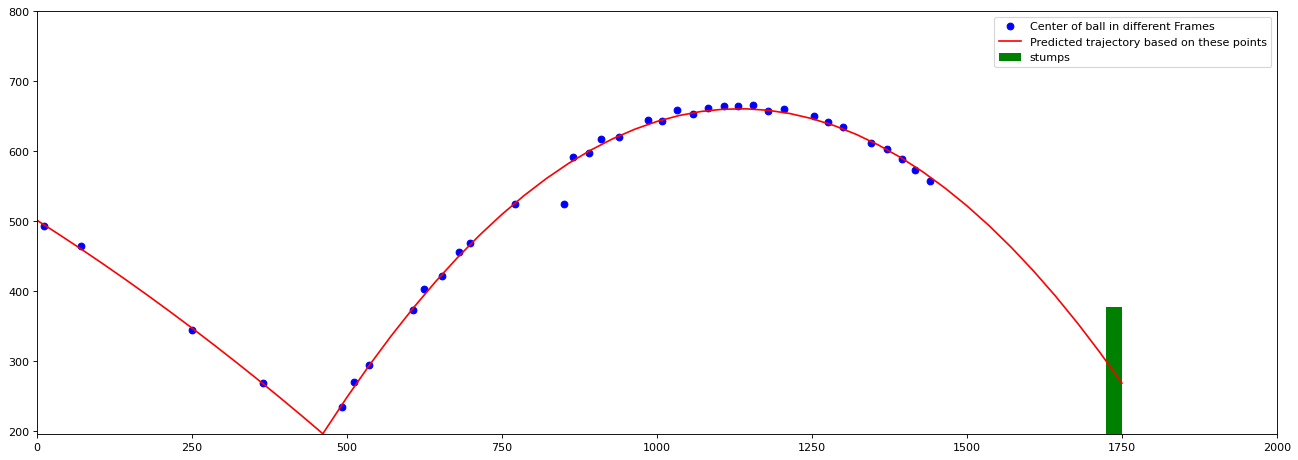

<Figure size 432x288 with 0 Axes>

"xnew = np.linspace(11, 1620, num=50, endpoint=True)\nf2 = interp1d(X, y, kind='quadratic')\nimport matplotlib.pyplot as plt\nplt.plot(X, y, 'o',  xnew, f2(xnew), '-')\naxes = plt.gca()\naxes.set_xlim([0,1900])\naxes.set_ylim([0,1000])\nplt.show()"

In [ ]:
X = np.array([])
y = np.array([])

def remove_errs(centers,X,y):
  #used to remove outlier points which may cause errors in the prediction
  oldx,oldy=0,0
  for c in centers:
    if c[1]>oldx and c[0]>200 and not (c[1]>1000 and c[1]<1500 and (1000-c[0])>200 and (1000-c[0])<400):
      X=np.append(X,c[1])
      y=np.append(y,1000-c[0])
    oldx = c[1]
    oldy = c[0]
  return X,y

def remove_duplicate(X,y):
  #used to remove duplicate values of x,y coordinates that may have been registered during the detection phase
  X_t,y_t,ids = [],[],[]
  for id,i in enumerate(X):
    if (i not in X_t):
      X_t.append(i)
    else:
      ids.append(id)
  for id,t in enumerate(y):
    if id not in ids:
      y_t.append(t)
  return X_t,y_t

def polyfitting(X,y):
  #used to fit a polynomial function (of degree 2) to the registered points. This acts as a prediction path for the ball
  p1 = np.poly1d(np.polyfit(X[:4], y[:4], 2))
  p2 = np.poly1d(np.polyfit(X[4:-10], y[4:-10], 2))
  return p1,p2

def plot_results(X,y,p1,p2):
  #plots the results obtained
  figure(num=None, figsize=(20, 7), dpi=80, facecolor='w', edgecolor='k')
  xnew = np.linspace(0, 1750, num=50, endpoint=True)
  plt.plot(X[:-10], y[:-10], 'o',color='blue', label = 'Center of ball in different Frames')
  plt.plot(xnew, p1(xnew), '-', color='red')
  plt.plot(xnew,p2(xnew),'-', color='red',label = 'Predicted trajectory based on these points')
  axes = plt.gca()
  axes.axvspan(1725, 1750,ymin=0,ymax=0.3, facecolor='g', alpha=1,label='stumps')
  axes.set_xlim([0,2000])
  axes.set_ylim([196,800])
  plt.legend()
  plt.figure()
  plt.show()

X,y = remove_errs(centers,X,y)
X,y = remove_duplicate(X,y)
p1,p2 = polyfitting(X,y)
plot_results(X,y,p1,p2)